In [ ]:
import pandas as pd

# Update file path to test.csv, if you have csv file
trainingData = pd.read_csv("train.csv", sep=",")
trainingData.head()

# Update file path to test.csv, if you have csv file
testingData = pd.read_csv("test.csv", sep=",")
testingData.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [ ]:
trainingData.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
trainingData.describe()

,Class Index
count,120000.000000
mean,2.500000
std,1.118039
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [ ]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
trainingData['Class Index'].value_counts()

,count
Class Index,
3,30000
4,30000
2,30000
1,30000


# Data Preprocessing
We want to convert all the text to lowercase to reduce the variability in the text

In [ ]:
trainTitle = trainingData['Title']
trainingData['Title'] = trainTitle.str.lower()

trainDescription = trainingData['Description']
trainingData['Description'] = trainDescription.str.lower()

testTitle = testingData['Title']
testingData['Title'] = testTitle.str.lower()

testDescription = testingData['Description']
testingData['Description'] = testDescription.str.lower()

trainingData.head()



,Class Index,Title,Description
0,3,wall st. bears claw back into the black (reuters),"reuters - short-sellers, wall street's dwindli..."
1,3,carlyle looks toward commercial aerospace (reu...,reuters - private investment firm carlyle grou...
2,3,oil and economy cloud stocks' outlook (reuters),reuters - soaring crude prices plus worries\ab...
3,3,iraq halts oil exports from main southern pipe...,reuters - authorities have halted oil export\f...
4,3,"oil prices soar to all-time record, posing new...","afp - tearaway world oil prices, toppling reco..."


Next we need to tokenize our inputs by using the word2vec model from google

In [ ]:
!pip install gensim
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

In [ ]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import nltk
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Here we tokenize each title and description and preprocess the word

In [ ]:
titles = []
for sent in trainingData['Title']:
  sent_token = sent_tokenize(sent)
  for word in sent_token:
    titles.append(simple_preprocess(word))

descriptions = []
for sent in trainingData['Description']:
  sent_token = sent_tokenize(sent)
  for word in sent_token:
    descriptions.append(simple_preprocess(word))


print(len(titles))
print(len(descriptions))

121805
153098


In [ ]:
testTitles = []
for sent in testingData['Title']:
  sent_token = sent_tokenize(sent)
  for word in sent_token:
    testTitles.append(simple_preprocess(word))

testDescriptions = []
for sent in testingData['Description']:
  sent_token = sent_tokenize(sent)
  for word in sent_token:
    testDescriptions.append(simple_preprocess(word))


print(testTitles[2])
print(testDescriptions[2])

['ky', 'company', 'wins', 'grant', 'to', 'study', 'peptides', 'ap']
['ap', 'company', 'founded', 'by', 'chemistry', 'researcher', 'at', 'the', 'university', 'of', 'louisville', 'won', 'grant', 'to', 'develop', 'method', 'of', 'producing', 'better', 'peptides', 'which', 'are', 'short', 'chains', 'of', 'amino', 'acids', 'the', 'building', 'blocks', 'of', 'proteins']


In [ ]:
trainingClasses = pd.get_dummies(trainingData['Class Index'], columns = trainingData['Class Index']).values
testingClasses = pd.get_dummies(testingData['Class Index'], columns = testingData['Class Index']).values
print(trainingClasses)
print(testingClasses)

[[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [False  True False False]
 [False  True False False]
 [False  True False False]]
[[False False  True False]
 [False False False  True]
 [False False False  True]
 ...
 [False  True False False]
 [False False  True False]
 [False False  True False]]


In [ ]:
trainingData['Title'][0]

'wall st. bears claw back into the black (reuters)'

In [ ]:
articles = []
for i in range(len(trainingData)):
  articles.append(trainingData['Title'][i] + trainingData['Description'][i])

print(articles[2])

testArticles = []
for i in range(len(testingData)):
  testArticles.append(testingData['Title'][i] + testingData['Description'][i])

print(testArticles[2])

oil and economy cloud stocks' outlook (reuters)reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
ky. company wins grant to study peptides (ap)ap - a company founded by a chemistry researcher at the university of louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.


In [ ]:
print(titles[0])

['wall', 'st', 'bears', 'claw', 'back', 'into', 'the', 'black', 'reuters']


In [ ]:
model = gensim.models.Word2Vec(articles,window=5,min_count=2)
model.wv.index_to_key

KeyboardInterrupt: 

In [ ]:
model.wv.similar_by_word('prison')

[('jail', 0.870495617389679),
 ('sentence', 0.7551313042640686),
 ('sentenced', 0.6868290901184082),
 ('ghraib', 0.6134190559387207),
 ('sentencing', 0.6073592901229858),
 ('army', 0.6019896864891052),
 ('murder', 0.6017889380455017),
 ('abusing', 0.5986002087593079),
 ('prisoner', 0.5970202684402466),
 ('obstructing', 0.5808377861976624)]

# Define the Tokenizer

In [ ]:
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
maxlen = 3000
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True)
tokenizer.fit_on_texts(articles)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
x_train_sequences = tokenizer.texts_to_sequences(articles)
x_test_sequences = tokenizer.texts_to_sequences(testArticles)

In [ ]:
x_train_sequences[0]

[444,
 482,
 1718,
 14129,
 109,
 64,
 1,
 840,
 20,
 20,
 755,
 8025,
 444,
 6408,
 10093,
 2861,
 4,
 5643,
 26084,
 38,
 3993,
 821,
 410]

In [ ]:
len(x_train_sequences[0]),len(x_train_sequences[1])

(23, 39)

Since the length of the vectors is not the same, we need to pad them to make them constant

In [ ]:
# Since the number representation of the text are not the same, we need to pad them in order to make them same
from tensorflow.keras.preprocessing.sequence import pad_sequences
articles = pad_sequences(x_train_sequences, maxlen=80,padding='pre')
testArticles = pad_sequences(x_test_sequences,maxlen=80,padding='pre')

In [ ]:
len(articles[0]),len(articles[1])

(80, 80)

# The Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping

In [ ]:
model2 = Sequential()
model2.add(Embedding(50000,100,input_length=80))  # Input as the number of words (vocabulary size)
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  #Softmax for multiclass
model2.add(Dense(4, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model2.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Training was taking forever, so I:
* Increased batch size from 64 -> 128 -> 256
* Reduced Epochs from 7 -> 5 -> 4
* Increased Validation split from 0.1 -> 0.2 -> 0.3 -> 0.1

| Hyperparameter   | Value |
| ---------------- | ----- |
| Batch Size       |  256  |
| Validation Split |  0. 1 |
| epochs           |    4  |
| dropout          |   0.2 |


In [ ]:
history = model2.fit(articles, trainingClasses, epochs=4, batch_size=256,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/4
422/422 ━━━━━━━━━━━━━━━━━━━━ 122s 279ms/step - accuracy: 0.7357 - loss: 0.6855 - val_accuracy: 0.9087 - val_loss: 0.2695
Epoch 2/4
422/422 ━━━━━━━━━━━━━━━━━━━━ 115s 273ms/step - accuracy: 0.9315 - loss: 0.2233 - val_accuracy: 0.9086 - val_loss: 0.2623
Epoch 3/4
422/422 ━━━━━━━━━━━━━━━━━━━━ 143s 276ms/step - accuracy: 0.9508 - loss: 0.1601 - val_accuracy: 0.9028 - val_loss: 0.2840
Epoch 4/4
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 273ms/step - accuracy: 0.9594 - loss: 0.1305 - val_accuracy: 0.9038 - val_loss: 0.2955


In [ ]:
accuracy = model2.evaluate(testArticles,testingClasses)
print(accuracy[0],accuracy[1])

238/238 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9069 - loss: 0.3118
0.29221221804618835 0.910921037197113


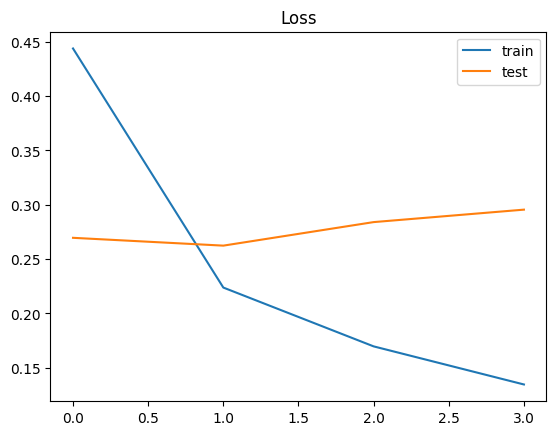

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

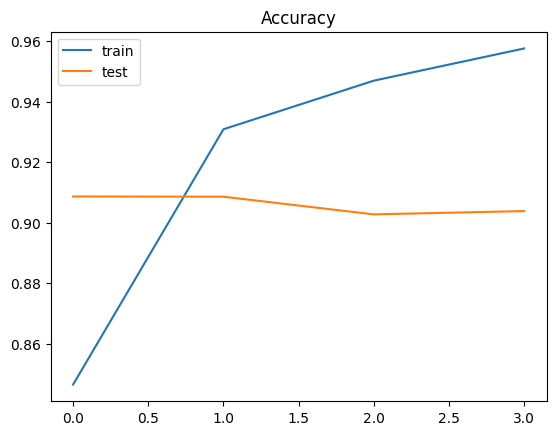

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();
